# 0.) Import and Clean data

In [102]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [103]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
y = df["country"]
X = df.drop(["country"], axis = 1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [76]:
kmeans = KMeans(n_clusters = 5, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10)

# 2.) Pick two features to visualize across

In [24]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

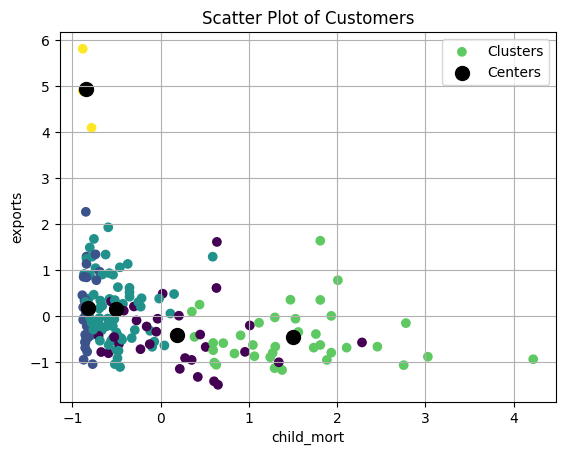

In [78]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


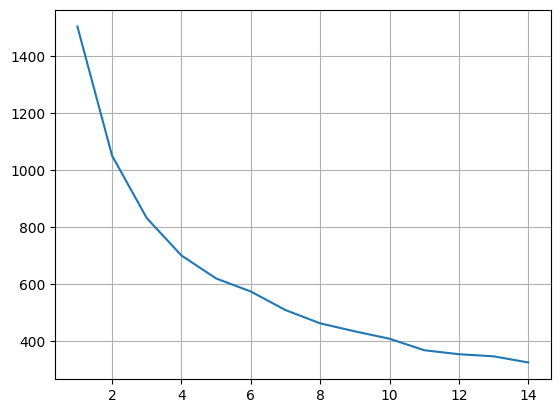

In [81]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k,n_init=30, init = 'random')
    kmeans.fit(X_scaled)
    # Sum of squared distances of samples to their closest cluster center,
    WCSSs.append(kmeans.inertia_)
    
plt.plot(Ks,WCSSs)
plt.xlabel('numbers of clusters')
plt.
plt.grid()
plt.show()

In [83]:
WCSSs =  [KMeans(n_clusters = k,n_init=30, init = 'random').fit(X_scaled).inertia_ for k in range(1,15)]
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.5205369722205,
 631.8675217248608,
 565.7164159178217,
 521.1037081407245,
 461.8637886625836,
 432.1913224419508,
 401.15245217492145,
 368.35076055768116,
 354.7865856762632,
 334.2155103471014,
 322.03668482938997]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

According to the elbow in the plot, I think I will choose 4 or 5 to be the number of clusters since it can been seen as the corner of elbow.

# 6.) Do the same for a silhoutte plot

In [63]:
from sklearn.metrics import silhouette_score

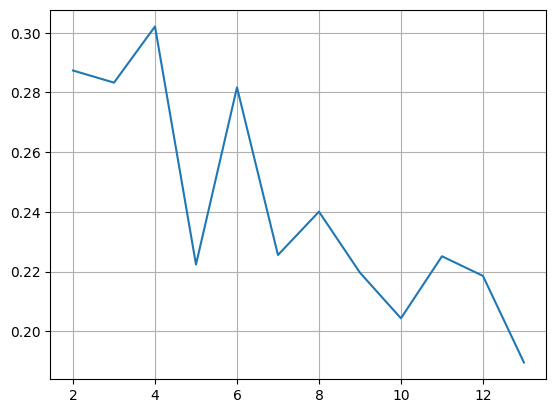

In [85]:
silhouettes = []
Ks = range(2,14)
for k in Ks:
    kmeans = KMeans(n_clusters = k,n_init=30, init = 'random')
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouettes.append(silhouette_avg)
    
plt.plot(Ks,silhouettes)
plt.grid()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [87]:
kmeans = KMeans(n_clusters = 2,n_init=30, init = 'random').fit(X_scaled)

In [92]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [93]:
output= pd.concat([preds,df],axis = 1)

In [94]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [97]:
print('Cluster 1:')
print(output.loc[output[0]==1, 'country'])

Cluster 1:
0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
19         Bolivia
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 68, dtype: object


In [ ]:
#### Write an observation

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [101]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [98]:
output.groupby(0).mean()

/var/folders/qt/992w1z9d7vl3nbkh47hwr1lr0000gn/T/ipykernel_8567/2649171287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [99]:
output.groupby(0).std()

/var/folders/qt/992w1z9d7vl3nbkh47hwr1lr0000gn/T/ipykernel_8567/2077230043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

From the data, the group 0 seems to contain more develped contries, gives relatively lower child mortality than the other group, relatively higer income, gdp and life expectation than the other group. The other factors seems not devidede so much between the two group.